In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the stackoverflow dataset
df = pd.read_csv('stackoverflow.csv')

# Drop the "id" and "reputation" columns
df = df.drop(['id', 'reputation'], axis=1)

# Drop either "upvotes" and "downvotes" or "net_user_upvotes"
# We will use "net_user_upvotes" for clustering
df = df.drop(['upvotes', 'downvotes'], axis=1)

# Print the first few rows of the modified dataset
df.head()


,question_count,avg_question_score,avg_question_view_count,answer_count,accepted_answer_count,avg_answer_score,no_of_badges,gold_badge_count,silver_badge_count,bronze_badge_count,badge_score,net_user_upvotes
0,10608,2.500000,2074.500000,10608,25,0.730769,10608,0,3432,7176,20904,731
1,124800,1.384615,732.153846,124800,54,1.570000,124800,0,41600,83200,249600,518
2,17372,3.000000,2030.000000,17372,112,1.128713,17372,404,5252,11716,36764,26
3,1507425,16.280000,9807.386667,1507425,46,3.940594,1507425,136350,552975,818100,4393500,735
4,6396,3.000000,3633.250000,6396,18,2.048780,6396,0,1968,4428,12300,17


In [10]:
# Get summary statistics for Stackoverflow data
df.describe()

,question_count,avg_question_score,avg_question_view_count,answer_count,accepted_answer_count,avg_answer_score,no_of_badges,gold_badge_count,silver_badge_count,bronze_badge_count,badge_score,net_user_upvotes
count,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000
mean,1.052646e+05,2.363550,2561.945672,1.052646e+05,9.844100,2.265301,1.052646e+05,6.936297e+03,3.844518e+04,5.988311e+04,2.830268e+05,130.584200
std,1.184310e+06,8.025248,8382.291272,1.184310e+06,63.942409,5.687780,1.184310e+06,1.115070e+05,4.411040e+05,6.494756e+05,3.409010e+06,465.242328
min,1.000000e+00,-5.000000,11.000000,1.000000e+00,1.000000,-9.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-13591.000000
25%,6.000000e+01,0.333333,393.215753,6.000000e+01,1.000000,0.333333,6.000000e+01,0.000000e+00,0.000000e+00,5.400000e+01,7.200000e+01,3.000000
50%,4.600000e+02,1.000000,1005.821429,4.600000e+02,2.000000,1.000000,4.600000e+02,0.000000e+00,7.200000e+01,3.600000e+02,7.200000e+02,18.000000
75%,4.608000e+03,2.250000,2353.675000,4.608000e+03,5.000000,2.166667,4.608000e+03,5.000000e+01,1.323000e+03,3.192000e+03,9.697500e+03,87.000000
max,5.887732e+07,483.000000,392849.000000,5.887732e+07,3218.000000,145.400000,5.887732e+07,8.411046e+06,1.931108e+07,3.115520e+07,1.925100e+08,17969.000000


In [11]:
# Check for missing values in Stackoverflow data
df.isnull().sum()

question_count             0
avg_question_score         0
avg_question_view_count    0
answer_count               0
accepted_answer_count      0
avg_answer_score           0
no_of_badges               0
gold_badge_count           0
silver_badge_count         0
bronze_badge_count         0
badge_score                0
net_user_upvotes           0
dtype: int64

<AxesSubplot: >

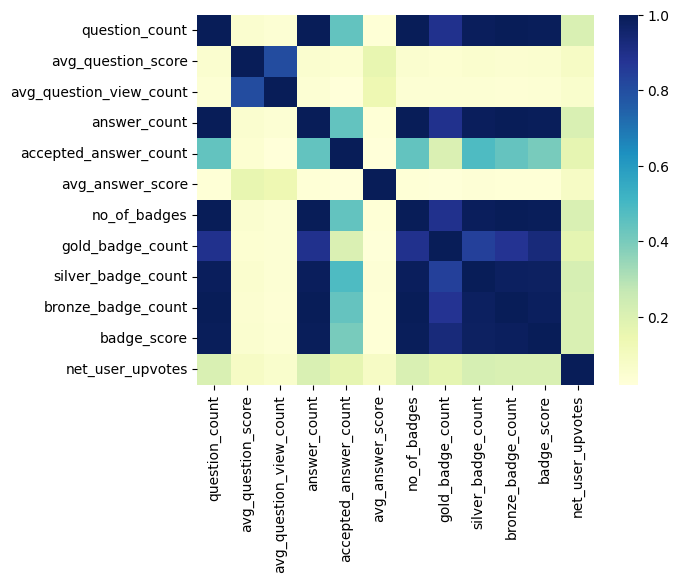

In [12]:
# Correlation heatmap for Stackoverflow data
corr_stackoverflow = df.corr()
sns.heatmap(corr_stackoverflow, cmap="YlGnBu")

In [14]:
from sklearn.preprocessing import StandardScaler

# Scale the columns using StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Convert the scaled array back into a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

# Print the first few rows of the scaled dataset
scaled_df.head()


,question_count,avg_question_score,avg_question_view_count,answer_count,accepted_answer_count,avg_answer_score,no_of_badges,gold_badge_count,silver_badge_count,bronze_badge_count,badge_score,net_user_upvotes
0,-0.079930,0.017003,-0.058155,-0.079930,0.237036,-0.269808,-0.079930,-0.062208,-0.079380,-0.081157,-0.076895,1.290609
1,0.016496,-0.121988,-0.218303,0.016496,0.690592,-0.122251,0.016496,-0.062208,0.007152,0.035903,-0.009806,0.832760
2,-0.074218,0.079310,-0.063464,-0.074218,1.597703,-0.199840,-0.074218,-0.058585,-0.075254,-0.074167,-0.072242,-0.224806
3,1.184007,1.734170,0.864418,1.184007,0.565473,0.294557,1.184007,1.160646,1.166517,1.167488,1.205828,1.299207
4,-0.083486,0.079310,0.127812,-0.083486,0.127557,-0.038070,-0.083486,-0.062208,-0.082699,-0.085389,-0.079419,-0.244152


In [15]:
# Feature engineering: create new features
scaled_df['question_score_per_view'] = scaled_df['avg_question_score'] / scaled_df['avg_question_view_count']
scaled_df['answer_score_per_count'] = scaled_df['avg_answer_score'] / scaled_df['answer_count']

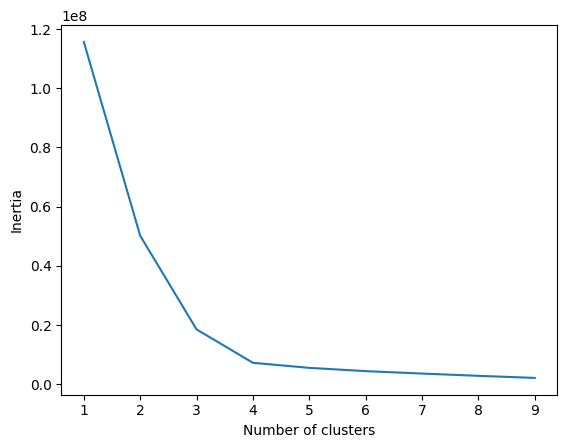

In [16]:
from sklearn.cluster import KMeans

# Find optimal number of clusters using elbow method
inertias = []
for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [17]:
# Perform clustering with selected number of clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

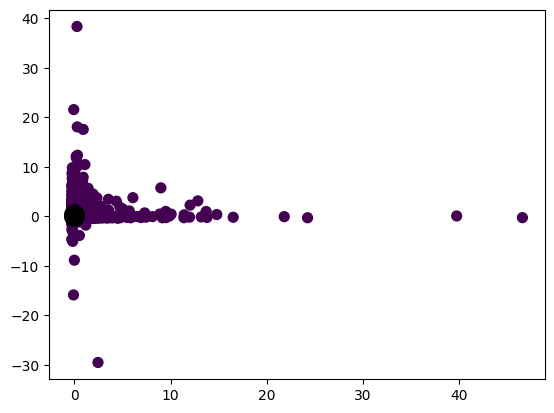

In [31]:
# Visualize clusters
labels = kmeans.predict(scaled_df)
plt.scatter(scaled_df.iloc[:, 2], scaled_df.iloc[:, -3], c=labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);